In [1]:
import numpy as np
import matplotlib.pyplot as plt

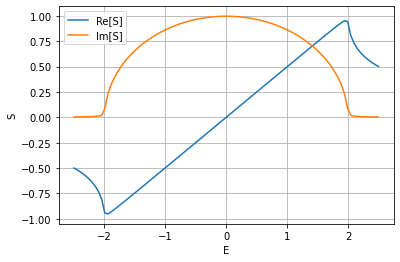

In [2]:
# Linear monatomic semi-infinite chain

alpha = 0.0
beta = -1.0
eta = 1e-2

H = alpha
V = beta
V_dag = V

E_array = np.linspace(-2.5, 2.5, 100)
S_array = np.zeros(len(E_array))*1j

def G_0(E):
    return 1 / (E + 1j*eta - H)

def S_n(G0, V, V_dag, S):
    return G0 / (1 - G0*V*S*V_dag)

n_max = 1000

for i in range(len(E_array)):
    G0 = G_0(E_array[i])
    S = G0
    for n in range(n_max):
        Sn = S_n(G0, V, V_dag, S)
        S = Sn
    S_array[i] = S
    
plt.plot(E_array, S_array.real, label='Re[S]')
plt.plot(E_array, -S_array.imag, label='Im[S]')
plt.xlabel('E')
plt.ylabel('S')
plt.legend()
plt.grid()
plt.show()

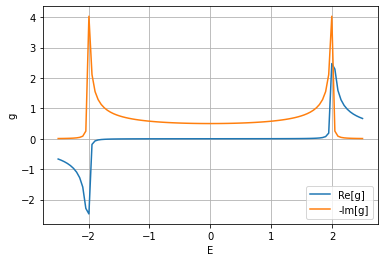

In [3]:
# Infinite linear chain (using the Dyson equation again to connect ends)

g = S_n(S_array, V, V_dag, S_array)

plt.plot(E_array, g.real, label='Re[g]')
plt.plot(E_array, -g.imag, label='-Im[g]')
plt.xlabel('E')
plt.ylabel('g')
plt.legend()
plt.grid()
plt.show()

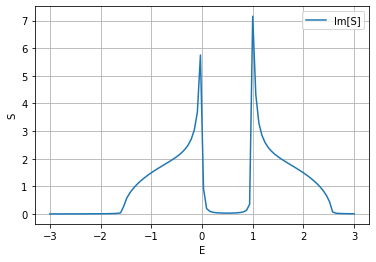

In [55]:
# Seminfinite AB chain

N = 2
alpha_A = 0.0
alpha_B = 1.0
beta = -1.0
eta = 1e-2

H = np.array([[alpha_A, 0],
              [0, alpha_B]])

V = np.array([[0, beta],
              [beta, 0]])


E_array = np.linspace(-3.0, 3.0, 100)
S_array = np.zeros((len(E_array),N,N))*1j

def G_0(E):
    return np.identity(N) / (E + 1j*eta - H)

def S_n(G0, V, S):
    return G0 @ np.linalg.inv(np.identity(N) - G0@V@S@V)

n_max = 1000

for i in range(len(E_array)):
    G0 = G_0(E_array[i])
    S = G0
    for n in range(n_max):
        Sn = S_n(G0, V, S)
        S = Sn
    S_array[i] = S
    

plt.plot(E_array, -np.trace(S_array, axis1=1, axis2=2).imag, label='Im[S]')
plt.xlabel('E')
plt.ylabel('S')
plt.legend()
plt.grid()
plt.show()

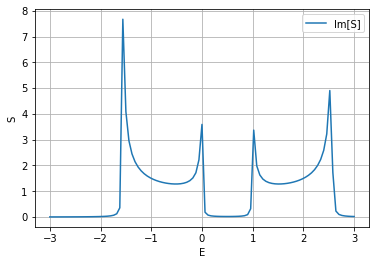

In [63]:
# Infinite AB chain

N = 2
alpha_A = 0.0
alpha_B = 1.0
beta = -1.0
eta = 1e-2

H = np.array([[alpha_A, 0],
              [0, alpha_B]])

V = np.array([[0, beta],
              [beta, 0]], dtype=complex)


E_array = np.linspace(-3.0, 3.0, 101)
g_array = np.zeros((len(E_array),N,N))*1j

def G_0(E):
    return np.identity(N) / (E + 1j*eta - H)

def S_n(G0, V, S):
    return G0 @ np.linalg.inv(np.identity(N) - G0@V@S@V.conj().T)

n_max = 1000

for i in range(len(E_array)):
    G0 = G_0(E_array[i])
    SR = G0
    SL = G0
    for n in range(n_max):
        SRn = S_n(G0, V, SR)
        SLn = S_n(G0, V.conj().T, SL)
        SR = SRn
        SL = SLn
    g_array[i] = S_n(SR, V.conj().T, SL)
    
plt.plot(E_array, -np.trace(g_array, axis1=1, axis2=2).imag, label='Im[S]')
plt.xlabel('E')
plt.ylabel('S')
plt.legend()
plt.grid()
plt.show()

In [69]:
# Stair chain
#V = [[beta 0], [0,beta]]